# INNIO Fleet Analysis

In [47]:
import pandas as pd
import numpy as np
import arrow
from pprint import pformat
from IPython.display import HTML, display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import dmyplant2
dmyplant2.cred(); mp = dmyplant2.MyPlant(3600)
from dfsm import msgFSM


### Define Engines from installed fleet 

In [48]:
def sfun(x): return all([("Forsa Hartmoor" in str(x['IB Site Name'])),(x['OperationalCondition'] != 'Decommissioned')])

In [49]:
fleet = mp.search_installed_fleet(sfun).drop('index', axis=1)
fleet = fleet.sort_values(by = "Engine ID",ascending=True).reset_index(drop='index')
ddl = pd.DataFrame(fleet['serialNumber'] + ' - ' + fleet['IB Site Name'] + ' ' + fleet['Engine ID'])[0].to_list()
ddl = [(m, i) for i, m in enumerate(ddl)]

In [50]:
from ipywidgets import AppLayout, Button, Layout, VBox, HBox, Label, HTML
def example_button(desc,style): 
    return Button(description=desc, button_style=style, layout=Layout(height='auto', width='auto'))

In [51]:
out = widgets.Output(layout={'height':'auto', 'width':'auto'})
global e

In [52]:
def on_dd_change(change):
    global e
    e=dmyplant2.Engine.from_fleet(mp,motor:=fleet.iloc[change['new']])

    with out:
       print(e)

In [53]:
fsm = msgFSM(e, p_from="2022-01-01", p_to=arrow.now(), frompickle=True)

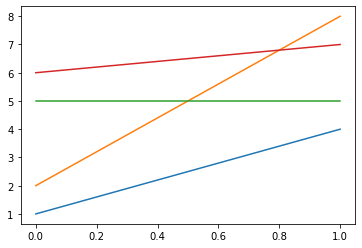

In [55]:
d = pd.DataFrame([[1,2,5,6],[4,8,5,7]])
fig, ax = plt.subplots()
ax.plot(d)

In [56]:
edd=widgets.Dropdown(options = ddl,value=0,description='Engine:',layout={'width':'2000px'},disabled=False)
edd.observe(on_dd_change, names='value')

minus=Button(description='<', button_style='info', layout=Layout(width='100px'))
def on_button_clicked(b):
    with out:
        print('hi')
minus.on_click(on_button_clicked)

In [57]:
AppLayout(  header=HBox([
                edd,
                minus,
                plus:=Button(description='>', button_style='info', layout=Layout(width='100px'))
            ]),
            left_sidebar=VBox([
                HTML('<h3>Service Selector:</h3>'),
                mode_qm:=widgets.Checkbox(value=False,description='?',layout={'width':'auto'},disabled=False,indent=False),
                mode_off:=widgets.Checkbox(value=False,description='OFF',layout={'width':'auto'},disabled=False,indent=False),
                mode_manual:=widgets.Checkbox(value=False,description='MANUAL',layout={'width':'auto'},disabled=False,indent=False),
                mode_auto:=widgets.Checkbox(value=False,description='AUTO',layout={'width':'auto'},disabled=False,indent=False),
                HTML('<h3>Start:</h3>'),
                start_failed:=widgets.Checkbox(value=False,description='Failed',layout={'width':'auto'},disabled=False,indent=False),
                start_success:=widgets.Checkbox(value=False,description='Success',layout={'width':'auto'},disabled=False,indent=False),

            ]),
            #center= example_button('center','warning'),
            #center=out,
            center=fig,
            right_sidebar=None,
            footer= example_button('footer','success'),
            pane_widths=['150px',6,'0px'],
            pane_heights=['40px','600px','40px'])

TraitError: The 'center' trait of an AppLayout instance expected a Widget or None, not the Figure <Figure size 432x288 with 1 Axes>.

In [ ]:
pd.DataFrame(fsm._starts)[['index'] +['startpreparation','starter','hochlauf','idle','synchronize','loadramp']].round(2)

In [ ]:
import matplotlib.pyplot as plt
import bokeh
import arrow
from collections import namedtuple

from pprint import (pprint as pp, pformat as pf)

import warnings
pd.options.mode.chained_assignment = None # default warn => SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=UserWarning)